In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 12s 1us/step


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
single_image = x_train[0]

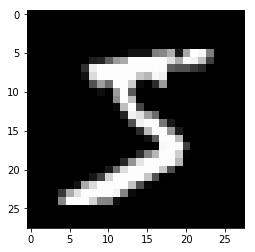

In [12]:
plt.imshow(single_image,cmap='gray') 

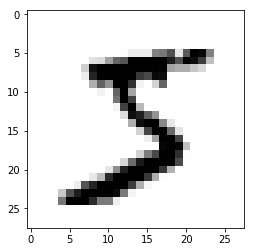

In [13]:
plt.imshow(single_image,cmap='gray_r') 

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
y_train.shape

(60000,)

Convertir las categorías en una codificación de gama alta para que las pueda interpretar como tales.

In [16]:
from keras.utils.np_utils import to_categorical

In [25]:
y_category_test = to_categorical(y_test, 10)
y_category_train = to_categorical(y_train, 10)

In [26]:
y_category_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
y_category_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
y_category_train.shape

(60000, 10)

In [22]:
y_category_test.shape

(10000, 10)

In [28]:
y_category_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [32]:
single_image.max()

255

In [33]:
x_train = x_train / x_train.max()

In [34]:
x_test = x_test / x_test.max()

In [35]:
scaled_image = x_train[0]

In [36]:
scaled_image.max()

1.0

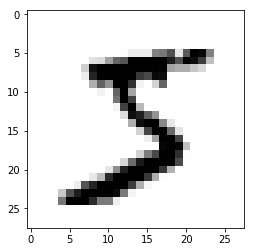

In [37]:
plt.imshow(scaled_image,cmap='gray_r')

In [38]:
x_train.shape

(60000, 28, 28)

In [39]:
x_train = x_train.reshape(60000,28,28,1)

In [40]:
x_train.shape

(60000, 28, 28, 1)

In [41]:
x_test = x_test.reshape(10000,28,28,1)

In [42]:
x_test.shape

(10000, 28, 28, 1)

In [43]:
from keras.models import Sequential

In [44]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [47]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1), activation='relu'))

#POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# Pasar de 2D a 1D
model.add(Flatten())

#DENDE LAYER
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])




In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(x_train, y_category_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 15s 257us/step - loss: 0.1362 - acc: 0.9587
Epoch 2/2
60000/60000 [==============================] - 16s 267us/step - loss: 0.0484 - acc: 0.98580s - loss: 0.0477 - a


In [53]:
model.metrics_names

['loss', 'acc']

In [54]:
# Evaluar el modelo
model.evaluate(x_test,y_category_test)

10000/10000 [==============================] - 1s 57us/step


[0.0457442107916344, 0.9847]

In [55]:
from sklearn.metrics import classification_report

In [56]:
predictions = model.predict_classes(x_test)

In [57]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [58]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [59]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       1.00      0.99      0.99      1135
          2       0.99      0.97      0.98      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.98      0.99       982
          5       0.98      0.99      0.99       892
          6       0.99      0.98      0.99       958
          7       0.99      0.98      0.98      1028
          8       0.96      0.99      0.97       974
          9       0.98      0.97      0.98      1009

avg / total       0.98      0.98      0.98     10000

